In [1]:
!wget https://github.com/Fadhil2000/daun_dataset/archive/refs/heads/main.zip

--2021-11-08 03:43:29--  https://github.com/Fadhil2000/daun_dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Fadhil2000/daun_dataset/zip/refs/heads/main [following]
--2021-11-08 03:43:29--  https://codeload.github.com/Fadhil2000/daun_dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]  10.84M  28.2MB/s    in 0.4s    

2021-11-08 03:43:29 (28.2 MB/s) - ‘main.zip’ saved [11367575]



In [110]:
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [111]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [112]:
cd daun_dataset-main/train/daun_seledri

/content/daun_dataset-main/train/daun_seledri


In [113]:
ls

'seledri_(10).jpg'  'seledri_(22).jpg'  'seledri_(34).jpg'  'seledri_(46).jpg'
'seledri_(11).jpg'  'seledri_(23).jpg'  'seledri_(35).jpg'  'seledri_(47).jpg'
'seledri_(12).jpg'  'seledri_(24).jpg'  'seledri_(36).jpg'  'seledri_(48).jpg'
'seledri_(13).jpg'  'seledri_(25).jpg'  'seledri_(37).jpg'  'seledri_(49).jpg'
'seledri_(14).jpg'  'seledri_(26).jpg'  'seledri_(38).jpg'  'seledri_(4).jpg'
'seledri_(15).jpg'  'seledri_(27).jpg'  'seledri_(39).jpg'  'seledri_(50).jpg'
'seledri_(16).jpg'  'seledri_(28).jpg'  'seledri_(3).jpg'   'seledri_(5).jpg'
'seledri_(17).jpg'  'seledri_(29).jpg'  'seledri_(40).jpg'  'seledri_(6).jpg'
'seledri_(18).jpg'  'seledri_(2).jpg'   'seledri_(41).jpg'  'seledri_(7).jpg'
'seledri_(19).jpg'  'seledri_(30).jpg'  'seledri_(42).jpg'  'seledri_(8).jpg'
'seledri_(1).jpg'   'seledri_(31).jpg'  'seledri_(43).jpg'  'seledri_(9).jpg'
'seledri_(20).jpg'  'seledri_(32).jpg'  'seledri_(44).jpg'
'seledri_(21).jpg'  'seledri_(33).jpg'  'seledri_(45).jpg'


In [114]:
args = {
    "image": "seledri_(10).jpg"
}

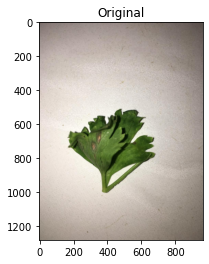

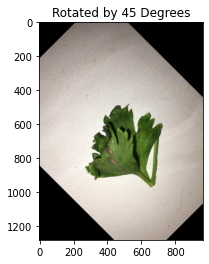

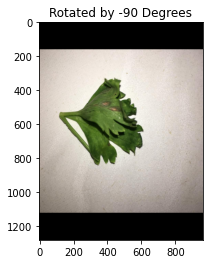

In [115]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

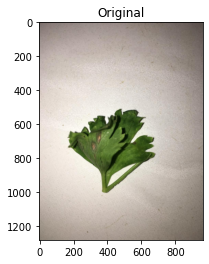

[INFO] flipping image horizontally...


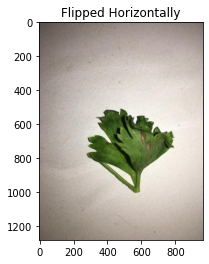

In [116]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

In [117]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [118]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [119]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [120]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

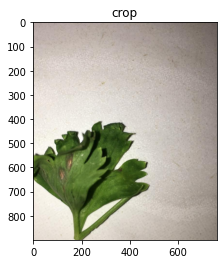

In [133]:
cropped = image[100:1000, 200:1000]
plt_imshow("crop", cropped)

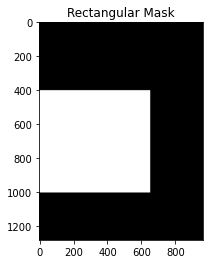

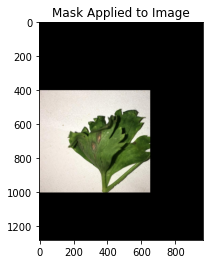

In [162]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 400), (650, 1000), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

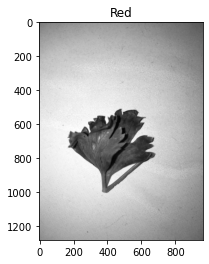

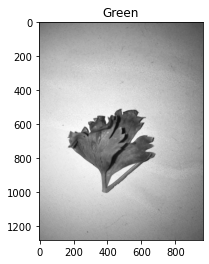

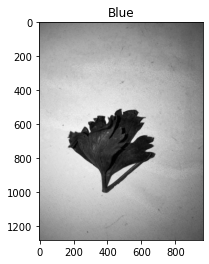

In [163]:
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

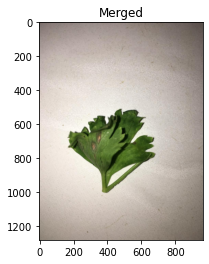

In [164]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

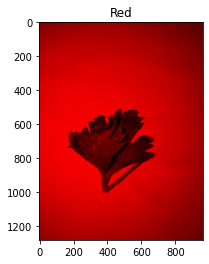

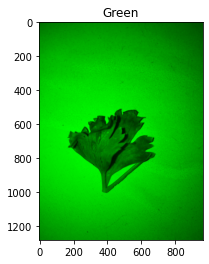

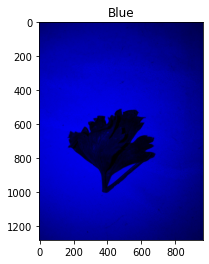

In [165]:
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

In [167]:
cd ..

/content/daun_dataset-main/train


In [168]:
cd ..

/content/daun_dataset-main


In [169]:
cd ..

/content


In [74]:
jambuBiji = os.listdir("daun_dataset-main/train/daun_jambubiji") 
seledri = os.listdir("daun_dataset-main/train/daun_seledri")
print("data training JB : " + str(len(jambuBiji)))
print("data training S : " + str(len(seledri)))

data training JB : 50
data training S : 50


In [71]:
data = []
labels = []

for i in jambuBiji:
    try:
    
        image = cv2.imread("daun_dataset-main/train/daun_jambubiji"+i)
        image_array = Image.fromarray(image , 'RGB')
        #Resize funct
        resize_img = image_array.resize((50 , 50))
        #Rotate funct
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in seledri:
    try:
        
        image = cv2.imread("daun_dataset-main/train/daun_seledri"+u)
        image_array = Image.fromarray(image , 'RGB')
        #Resize funct
        resize_img = image_array.resize((50 , 50))
        #Resize funct
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')